In [1]:
#Importing libraries 

import requests

import urllib.request

from bs4 import BeautifulSoup

url="https://www.mohfw.gov.in/"

In [2]:
#Get the HTML content 

response= requests.get(url)

print(response)



<Response [200]>


In [3]:
htmlcontent=response.content

#print(htmlcontent)

In [4]:
#Parse the html content 

soup = BeautifulSoup(htmlcontent, "html.parser")

#print(soup)

#print(soup.prettify )

In [5]:
states=[]
all_rows=soup.findAll('tr')
print(all_rows)

def extract_contents(row):
    return [x.text.replace('\n','') for x in row]

[<tr>
<th><strong>S. No.</strong></th>
<th><strong>Name of State / UT</strong></th>
<th><strong>Active Cases*</strong></th>
<th><strong>Cured/Discharged/Migrated*</strong></th>
<th><strong>Deaths**</strong></th>
<th><strong>Total Confirmed cases*</strong></th>
</tr>, <tr>
<td>1</td>
<td>Andaman and Nicobar Islands</td>
<td>0</td>
<td>33</td>
<td>0</td>
<td>33</td>
</tr>, <tr>
<td>2</td>
<td>Andhra Pradesh</td>
<td>1654</td>
<td>2576</td>
<td>73</td>
<td>4303</td>
</tr>, <tr>
<td>3</td>
<td>Arunachal Pradesh</td>
<td>44</td>
<td>1</td>
<td>0</td>
<td>45</td>
</tr>, <tr>
<td>4</td>
<td>Assam</td>
<td>1651</td>
<td>498</td>
<td>4</td>
<td>2153</td>
</tr>, <tr>
<td>5</td>
<td>Bihar</td>
<td>2342</td>
<td>2225</td>
<td>29</td>
<td>4596</td>
</tr>, <tr>
<td>6</td>
<td>Chandigarh</td>
<td>77</td>
<td>222</td>
<td>5</td>
<td>304</td>
</tr>, <tr>
<td>7</td>
<td>Chhattisgarh</td>
<td>633</td>
<td>244</td>
<td>2</td>
<td>879</td>
</tr>, <tr>
<td>8</td>
<td>Dadar Nagar Haveli</td>
<td>13</td>
<td>

In [6]:
for row in all_rows:
    stats=extract_contents(row.findAll('td'))
    if len(stats) == 6:
        states.append(stats)

In [7]:
print(states)

[['1', 'Andaman and Nicobar Islands', '0', '33', '0', '33'], ['2', 'Andhra Pradesh', '1654', '2576', '73', '4303'], ['3', 'Arunachal Pradesh', '44', '1', '0', '45'], ['4', 'Assam', '1651', '498', '4', '2153'], ['5', 'Bihar', '2342', '2225', '29', '4596'], ['6', 'Chandigarh', '77', '222', '5', '304'], ['7', 'Chhattisgarh', '633', '244', '2', '879'], ['8', 'Dadar Nagar Haveli', '13', '1', '0', '14'], ['9', 'Delhi', '15311', '10315', '708', '26334'], ['10', 'Goa', '131', '65', '0', '196'], ['11', 'Gujarat', '4901', '13003', '1190', '19094'], ['12', 'Haryana', '1439', '2134', '24', '3597'], ['13', 'Himachal Pradesh', '199', '189', '5', '393'], ['14', 'Jammu and Kashmir', '2202', '1086', '36', '3324'], ['15', 'Jharkhand', '464', '410', '7', '881'], ['16', 'Karnataka', '3090', '1688', '57', '4835'], ['17', 'Kerala', '973', '712', '14', '1699'], ['18', 'Ladakh', '48', '48', '1', '97'], ['19', 'Madhya Pradesh', '2734', '5878', '384', '8996'], ['20', 'Maharashtra', '42224', '35156', '2849', '80

In [8]:
new_cols=['S.No','Name of State / UT','Active Cases','Cured/Discharged/Migrated','Deaths','Total Confirmed cases']

In [9]:
import pandas as pd

In [10]:
state_data=pd.DataFrame(data=states,columns=new_cols)

In [11]:
state_data.head()

,S.No,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1654,2576,73,4303
2,3,Arunachal Pradesh,44,1,0,45
3,4,Assam,1651,498,4,2153
4,5,Bihar,2342,2225,29,4596


In [12]:
state_data


,S.No,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,1,Andaman and Nicobar Islands,0,33,0,33
1,2,Andhra Pradesh,1654,2576,73,4303
2,3,Arunachal Pradesh,44,1,0,45
3,4,Assam,1651,498,4,2153
4,5,Bihar,2342,2225,29,4596
5,6,Chandigarh,77,222,5,304
6,7,Chhattisgarh,633,244,2,879
7,8,Dadar Nagar Haveli,13,1,0,14
8,9,Delhi,15311,10315,708,26334
9,10,Goa,131,65,0,196


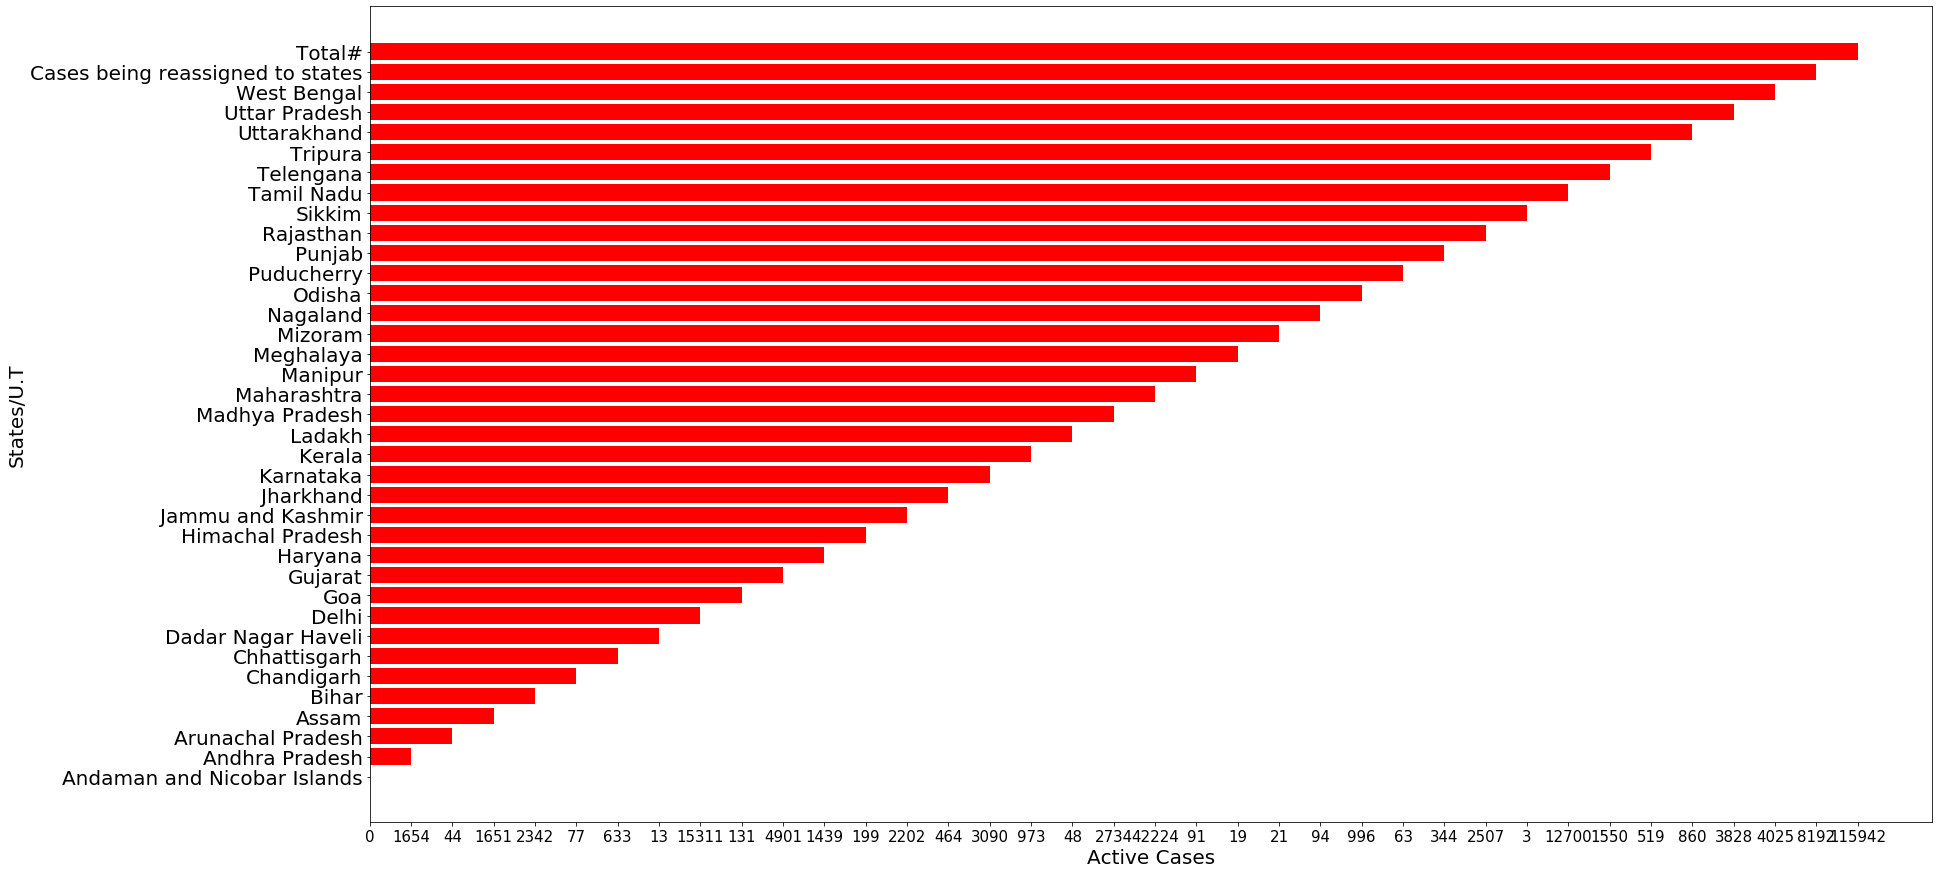

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(28,15))
plt.barh(state_data['Name of State / UT'],state_data['Active Cases'],color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Active Cases',fontsize=20)
plt.ylabel('States/U.T',fontsize=20)

plt.show()

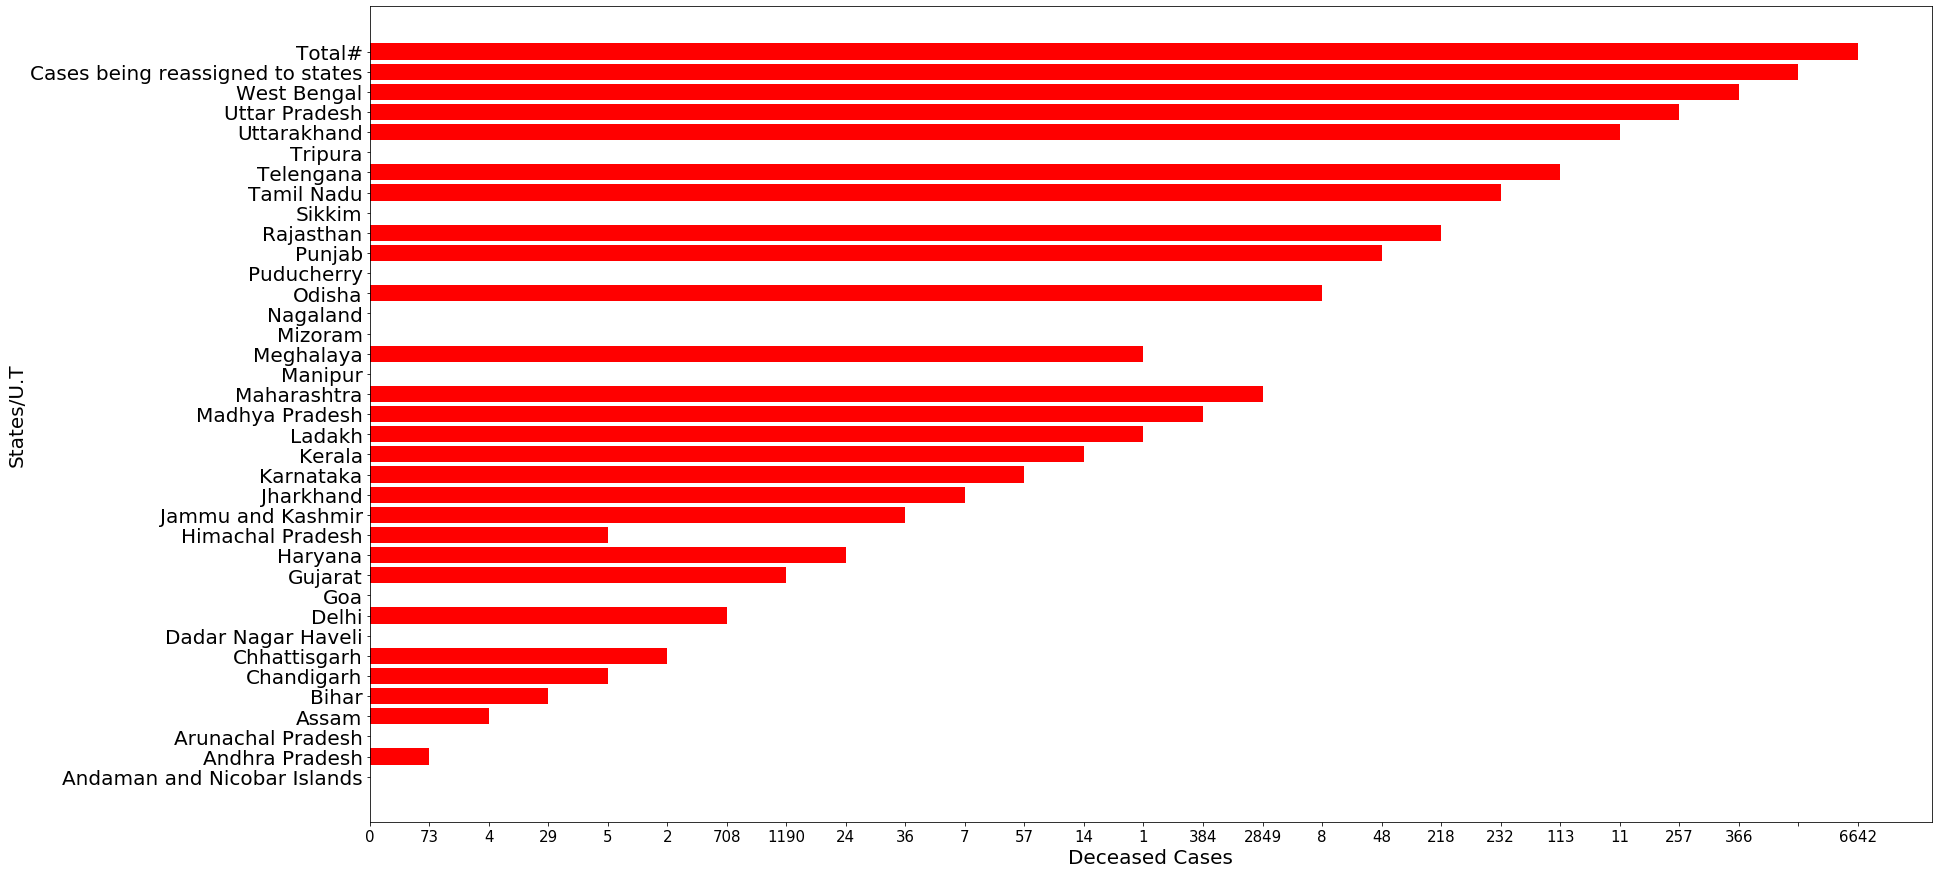

In [15]:
plt.figure(figsize=(28,15))
plt.barh(state_data['Name of State / UT'],state_data['Deaths'],color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
plt.xlabel('Deceased Cases',fontsize=20)
plt.ylabel('States/U.T',fontsize=20)

plt.show()

In [16]:
import geopandas as gpd


In [17]:
data_map = gpd.read_file('Indian_States.shp')


In [18]:
print(data_map.head())

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...


In [19]:
data_map['st_nm']

0     Andaman & Nicobar Island
1           Arunanchal Pradesh
2                        Assam
3                        Bihar
4                   Chandigarh
5                 Chhattisgarh
6       Dadara & Nagar Havelli
7                  Daman & Diu
8                          Goa
9                      Gujarat
10                     Haryana
11            Himachal Pradesh
12             Jammu & Kashmir
13                   Jharkhand
14                   Karnataka
15                      Kerala
16                 Lakshadweep
17              Madhya Pradesh
18                 Maharashtra
19                     Manipur
20                   Meghalaya
21                     Mizoram
22                    Nagaland
23                NCT of Delhi
24                  Puducherry
25                      Punjab
26                   Rajasthan
27                      Sikkim
28                  Tamil Nadu
29                   Telangana
30                     Tripura
31               Uttar Pradesh
32      

In [20]:
data_map['st_nm'].iloc[28]

'Tamil Nadu'

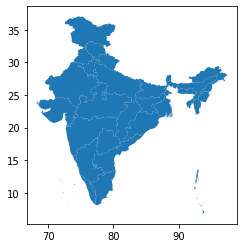

In [39]:
data_map.plot()

In [21]:
data_map.shape

(36, 2)

In [22]:
data_map.columns

Index(['st_nm', 'geometry'], dtype='object')

In [23]:
state_data.columns

Index(['S.No', 'Name of State / UT', 'Active Cases',
       'Cured/Discharged/Migrated', 'Deaths', 'Total Confirmed cases'],
      dtype='object')

In [40]:
data_map.rename(columns = {'st_nm':'Name of State / UT'}, inplace = True)

In [25]:
data_map.columns

Index(['Name of State / UT', 'geometry'], dtype='object')

In [26]:
print(data_map.head())
print(state_data.head())

         Name of State / UT                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...
  S.No           Name of State / UT Active Cases Cured/Discharged/Migrated  \
0    1  Andaman and Nicobar Islands            0                        33   
1    2               Andhra Pradesh         1654                      2576   
2    3            Arunachal Pradesh           44                         1   
3    4                        Assam         1651                       498   
4    5                        Bihar         2342                      2225   

  Deaths Total Confirmed cases  
0      0                

In [27]:
data_map['Name of State / UT'] =data_map['Name of State / UT'].str.replace('&','and')

In [28]:
data_map['Name of State / UT'].iloc[1] = 'Arunachal Pradesh'

C:\Users\haris\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
data_map['Name of State / UT'].iloc[6] = 'Dadar Nagar Haveli'

In [30]:
data_map['Name of State / UT'].iloc[23] = 'Delhi'
data_map['Name of State / UT'].iloc[29]='Telengana'


In [31]:
data_map

,Name of State / UT,geometry
0,Andaman and Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadar Nagar Haveli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman and Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


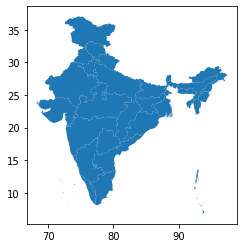

In [32]:
data_map.plot()

In [33]:
merged = pd.merge(data_map, state_data, on = 'Name of State / UT')

merged.drop('S.No', axis = 1, inplace = True)

merged.head()

,Name of State / UT,geometry,Active Cases,Cured/Discharged/Migrated,Deaths,Total Confirmed cases
0,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",44,1,0,45
1,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1651,498,4,2153
2,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2342,2225,29,4596
3,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",77,222,5,304
4,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",633,244,2,879


In [34]:
merged.shape

(33, 6)

In [35]:
data_map.shape

(36, 2)

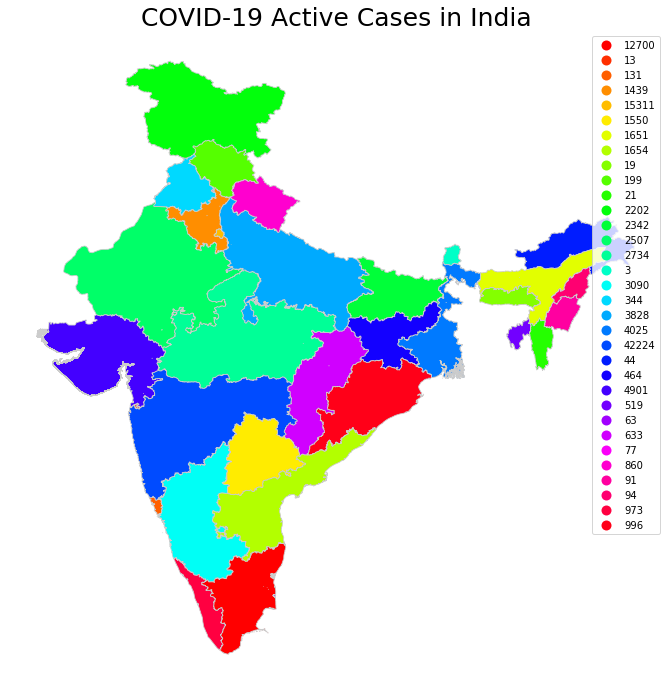

In [37]:
fig, ax = plt.subplots(1, figsize=(20, 12))

ax.axis('off')

#Set the title of the map

ax.set_title('COVID-19 Active Cases in India', fontsize=25)

merged.plot(column = 'Active Cases',cmap='hsv', linewidth=0.8, ax=ax, edgecolor='0.8',legend = True)

#Showing plot of India with coronavirus cases 

plt.show()

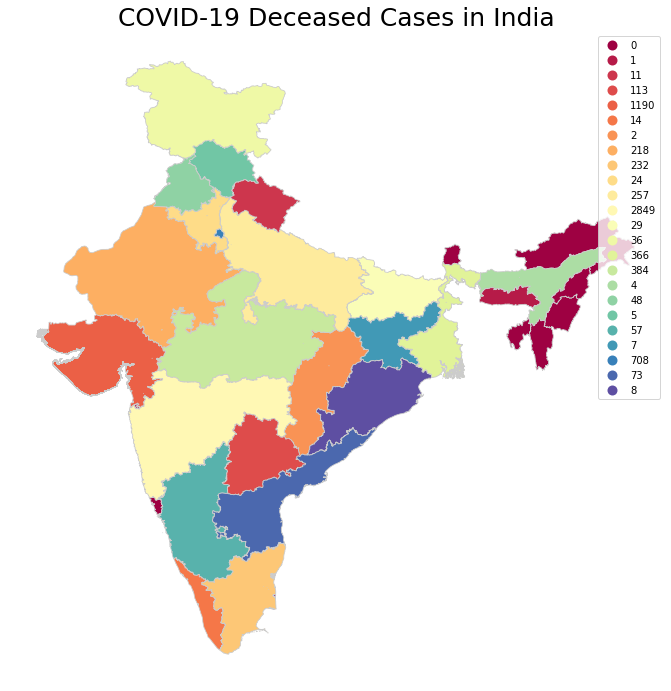

In [38]:
fig, ax = plt.subplots(1, figsize=(20, 12))

ax.axis('off')

#Set the title of the map

ax.set_title('COVID-19 Deceased Cases in India', fontsize=25)

merged.plot(column = 'Deaths',cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8',legend = True)

#Showing plot of India with coronavirus cases 

plt.show()